# EDA - 1 Bike Details Dataset

In [2]:

from google.colab import files

uploaded = files.upload()

Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [3]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

In [120]:
df = pd.read_csv('BIKE DETAILS.csv')

In [8]:
#1. What is the range of selling prices in the dataset?

selling_price = df['selling_price'].max() - df['selling_price'].min()

print("Selling prices Range :", selling_price)

Selling prices Range : 755000


In [7]:
# 2. What is the median selling price for bikes in the dataset?

selling_price_median = df['selling_price'].median()

print("Selling price Median :", selling_price_median)

Selling price Median : 45000.0


In [10]:
# 3. What is the most common seller type?

most_common_seller = df['seller_type'].mode()[0]

print("Most common seller type :", most_common_seller)

Most common seller type : Individual


In [11]:
# 4. How many bikes have driven more than 50,000 kilometers?

over50000 = (df['km_driven'] > 50000).sum()

print("Bikes driven more than 50,000 kilometers:", over50000)

Bikes driven more than 50,000 kilometers: 170


In [15]:
# 5. What is the average km_driven value for each ownership type?

avgerage_km_driven = df.groupby('owner')['km_driven'].mean()

print("Average km_driven value:")

print(avgerage_km_driven)

Average km_driven value:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [17]:
# 6. What proportion of bikes are from the year 2015 or older?

bikes2015orolder = (df['year'] <= 2015).mean()

print("Proportion of bikes are from the year 2015 or older :", bikes2015orolder *100,'%')

Proportion of bikes are from the year 2015 or older : 56.64467483506126 %


In [18]:
# 7. What is the trend of missing values across the dataset?

missingvalues = df.isnull().sum()

print("Missing values in each column:")
print(missingvalues)

Missing values in each column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [19]:
# 8. What is the highest ex_showroom_price recorded, and for which bike?

highest_ex_showroom = df['ex_showroom_price'].max()

bike_highest_ex_showroom = df.loc[df['ex_showroom_price'] == highest_ex_showroom, 'name'].values
print("Highest ex_showroom_price recorded:", highest_ex_showroom)

print("Bike highest ex_showroom_price:", bike_highest_ex_showroom)

Highest ex_showroom_price recorded: 1278000.0
Bike highest ex_showroom_price: ['Harley-Davidson Street Bob']


In [20]:
# 9. What is the total number of bikes listed by each seller type?

seller_type_counts = df['seller_type'].value_counts()
print("Total number of bikes listed by each seller:")

print(seller_type_counts)


Total number of bikes listed by each seller:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


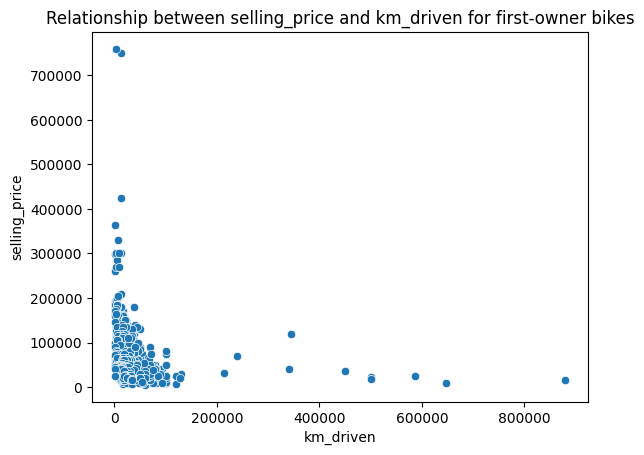

In [22]:
# 10. What is the relationship between selling_price and km_driven for first-owner bikes?
sns.scatterplot(data=df, x='km_driven', y='selling_price')

plt.title('Relationship between selling_price and km_driven for first-owner bikes')
plt.show()

In [23]:
# 11. Identify and remove outliers in the km_driven column using the IQR method.
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[~((df['km_driven'] < (Q1 - 1.5 * IQR)) | (df['km_driven'] > (Q3 + 1.5 * IQR)))]
print("No. of outliers removed:", len(df) - len(filtered_df))


No. of outliers removed: 39


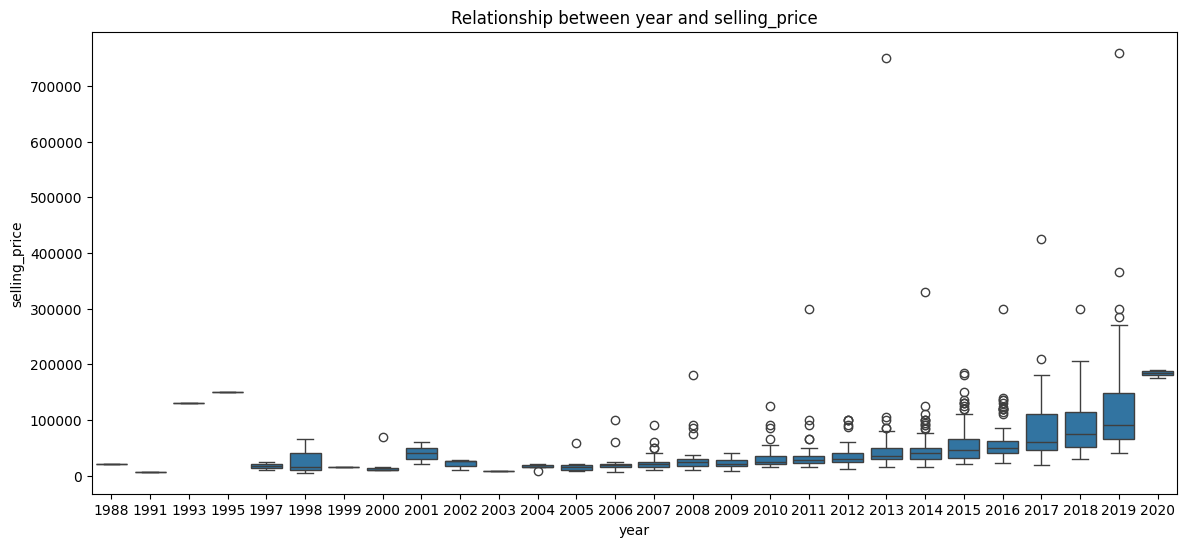

In [36]:
# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price.
plt.figure(figsize=(14,6))

sns.boxplot(data=df, x='year', y='selling_price')
plt.title('Relationship between year and selling_price')

plt.show()

In [37]:
# 13. What is the average depreciation in selling price based on the bike's age (2025 - year)?

df['age'] = 2025 - df['year']
average_depreciation_age = df.groupby('age')['selling_price'].mean()
print("Average depreciation in selling price based on bike age (2025 - year) :")

print(average_depreciation_age)

Average depreciation in selling price based on bike age (2025 - year) :
age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


In [40]:
# 14. Which bike names are priced significantly above the average price for their manufacturing year?

year_avgerage = df.groupby('year')['selling_price'].mean().reset_index()
merged = df.merge(year_avgerage, on='year', suffixes=('', '_year_avg'))
price_outliers = merged[merged['selling_price'] > (merged['selling_price_year_avg'] * 1.5)]

print("Bike names priced significantly above the average price :")
print(price_outliers['name'])


Bike names priced significantly above the average price :
2       Royal Enfield Classic Gunmetal Grey
7      Royal Enfield Bullet 350 [2007-2011]
13                            Yamaha YZF R3
18      Royal Enfield Classic Gunmetal Grey
23                            Jawa Standard
                       ...                 
979               Royal Enfield Thunder 500
981               Royal Enfield Thunder 350
983               Royal Enfield Classic 350
984               Royal Enfield Classic 500
985               Royal Enfield Classic 500
Name: name, Length: 157, dtype: object


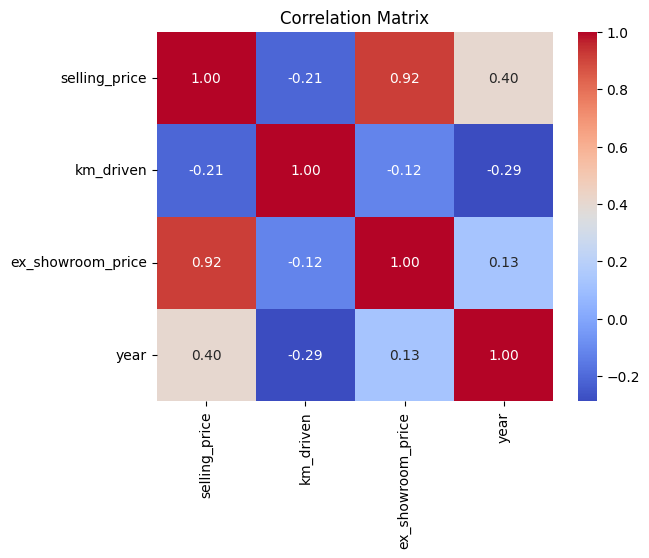

In [44]:
# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

correlationmatrix = df[['selling_price', 'km_driven', 'ex_showroom_price', 'year']].corr()

sns.heatmap(correlationmatrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix')
plt.show()

# EDA - 2 Car Sale Dataset

In [45]:
from google.colab import files
uploaded = files.upload()

Saving Car Sale.csv to Car Sale.csv


In [49]:
car_df = pd.read_csv('Car Sale.csv')

In [51]:
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
average_selling_price = car_df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

print("Average selling price of cars for each dealer : ")
print(average_selling_price)


Average selling price of cars for each dealer : 
Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                         

In [53]:
# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about pricing trends?
price_std_by_company = car_df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

print("Car brand (Company) has the highest variation in prices : ")
print(price_std_by_company)

Car brand (Company) has the highest variation in prices : 
Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


   what it tells about price trends :
   - Lincoln has the greatest variety of car prices, which means their vehicles range from relatively cheap to quite pricey. That implies that Lincoln sells a great range of cars for a range of different buyers — from less-costly buyers to luxury or premium buyers.

   - Brands such as Saab and Cadillac also exhibit a lot of price variation, which indicates that they probably have a varied range as well. Conversely, brands such as Hyundai and Porsche are much less varied, so their prices are kept within a smaller range. This generally implies that they specialize in a particular market segment — such as Hyundai going for affordability or Porsche remaining in the high-end sports car segment.

   - So overall, a high price range variation indicates the brand caters to a wider market with varying needs and budgets, whereas a low variation indicates they target a more niche market.

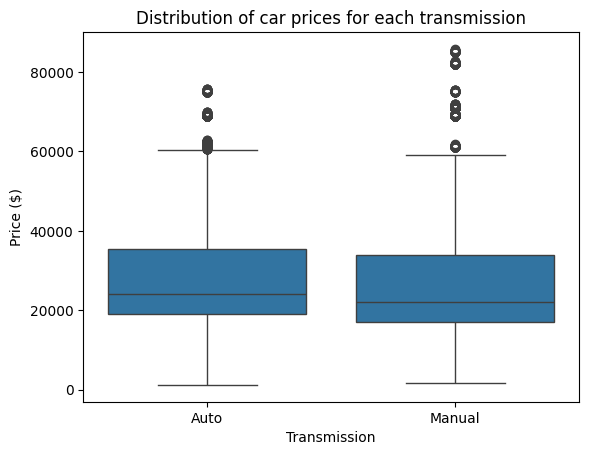

In [54]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
sns.boxplot(data=car_df, x='Transmission', y='Price ($)')

plt.title('Distribution of car prices for each transmission')
plt.show()

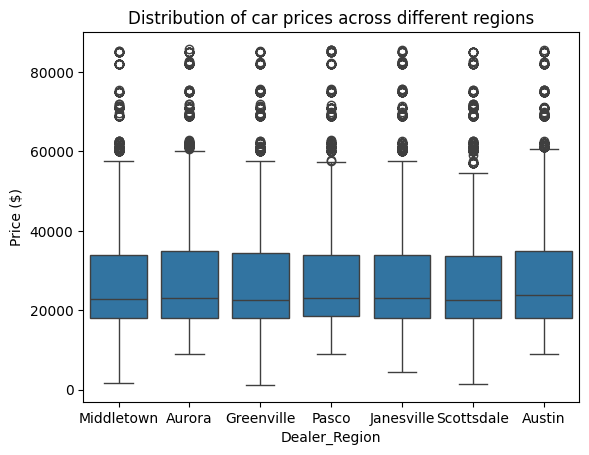

In [55]:
# 4. What is the distribution of car prices across different regions?
sns.boxplot(data=car_df, x='Dealer_Region', y='Price ($)')

plt.title('Distribution of car prices across different regions')
plt.show()

In [57]:
# 5. What is the distribution of cars based on body styles?
distribution_bodystyle = car_df['Body Style'].value_counts()

print("Distribution of cars based on body styles :")
print(distribution_bodystyle)


Distribution of cars based on body styles :
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


In [59]:
# 6. How does the average selling price of cars vary by customer gender and annual income?
avgerage_price_gender_income = car_df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean()

print("Average selling price of cars vary by customer gender and annual income:")
print(avgerage_price_gender_income)


Average selling price of cars vary by customer gender and annual income:
Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64


In [61]:
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
regionprice_distribution = car_df.groupby('Dealer_Region')['Price ($)'].describe()
carssold_region = car_df['Dealer_Region'].value_counts()

print("Distribution of car prices by region:")
print(regionprice_distribution)
print("Number of cars sold vary by region:")
print(carssold_region)

Distribution of car prices by region:
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco       

In [62]:
# 8. How does the average car price differ between cars with different engine sizes?
averageprice_engine = car_df.groupby('Engine')['Price ($)'].mean()

print("Average car price by engine size:")
print(averageprice_engine)

Average car price by engine size:
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


In [66]:
# 9. How do car prices vary based on the customer’s annual income bracket?
car_df['income_bracket'] = pd.cut(car_df['Annual Income'], bins=[0, 50000, 100000, 500000, 1000000, np.inf], labels=['<50K', '50K-100K', '100K-500K', '500K-1M', '1M+'])
averageprice_income_bracket = car_df.groupby('Annual Income')['Price ($)'].mean()
print("car prices vary based on the customer’s annual income : ")
print(averageprice_income_bracket)

car prices vary based on the customer’s annual income : 
Annual Income
10080       22801.000000
13500       27878.981415
24000       61001.000000
85000       43000.000000
106000      46001.000000
                ...     
6600000     39000.000000
6800000     15000.000000
7650000     21000.000000
8000000     85000.000000
11200000    26001.000000
Name: Price ($), Length: 2508, dtype: float64


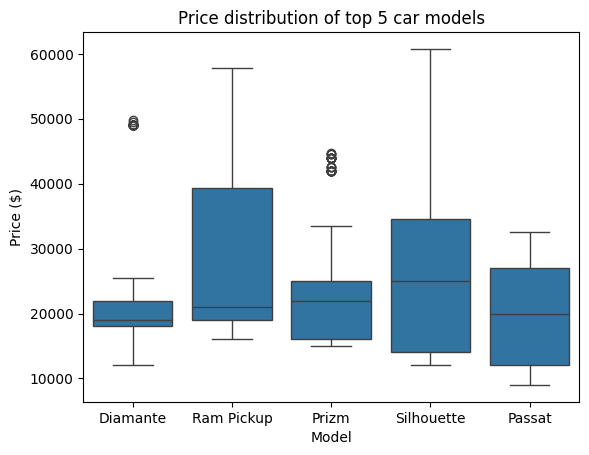

In [67]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_5_car_models = car_df['Model'].value_counts().head(5).index
sns.boxplot(data=car_df[car_df['Model'].isin(top_5_car_models)], x='Model', y='Price ($)')

plt.title('Price distribution of top 5 car models')
plt.show()

In [68]:
# 11.  How does car price vary with engine size across different car colors, and which colors have the highest price variation
color_engine_price = car_df.groupby(['Color', 'Engine'])['Price ($)'].mean().unstack()
price_color = car_df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)

print("Car price vary with engine size across different car colors :")
print(color_engine_price)
print("Colors with the highest price variation:")
print(price_color)


Car price vary with engine size across different car colors :
Engine      DoubleÂ Overhead Camshaft  Overhead Camshaft
Color                                                   
Black                    25766.451103       31732.967164
Pale White               30347.987460       24327.767694
Red                      27434.392314       30153.405229
Colors with the highest price variation:
Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [69]:
# 12. Is there any seasonal trend in car sales based on the date of sale?
car_df['Date'] = pd.to_datetime(car_df['Date'])
car_df['Month'] = car_df['Date'].dt.month
sales_month = car_df['Month'].value_counts().sort_index()

print("Seasonal trend in car sales based on the date of sale : ")
print(sales_month)


Seasonal trend in car sales based on the date of sale:
Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: count, dtype: int64


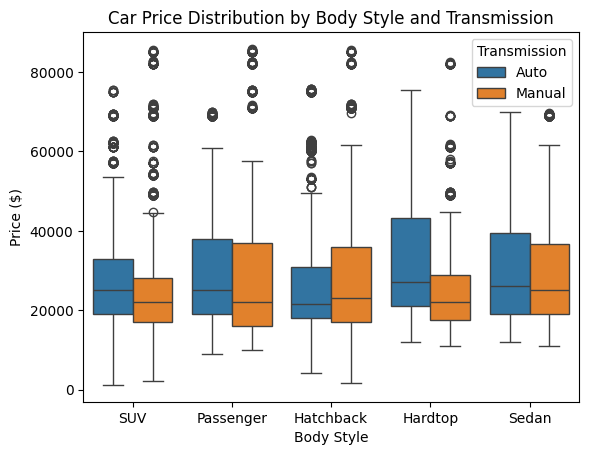

In [70]:
# 13. How does the car price distribution change when considering different combinations of body style and transmission type?
sns.boxplot(data=car_df, x='Body Style', y='Price ($)', hue = 'Transmission')

plt.title('Car Price Distribution by Body Style and Transmission')
plt.show()

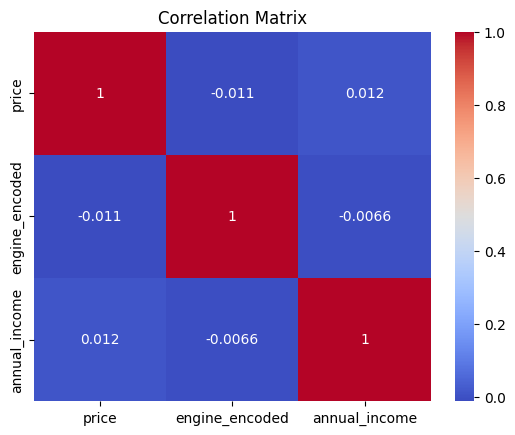

In [71]:
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
encodedengine = pd.factorize(car_df['Engine'])[0]
correlation_matrix = pd.DataFrame({
    'price': car_df['Price ($)'],
    'engine_encoded': encodedengine,
    'annual_income': car_df['Annual Income']
}).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [73]:
# 15. How does the average car price vary across different car models and engine types?
average_carprice_model_engine = car_df.groupby(['Model', 'Engine'])['Price ($)'].mean().sort_values(ascending=False)

print("Average car price by model and engine type: ")
print(average_carprice_model_engine)

Average car price by model and engine type: 
Model     Engine                   
SC        Overhead Camshaft            61074.818182
Ranger    DoubleÂ Overhead Camshaft    61064.055556
Sable     Overhead Camshaft            61039.770833
Catera    DoubleÂ Overhead Camshaft    56836.933333
LX470     Overhead Camshaft            54037.490196
                                           ...     
A4        Overhead Camshaft            12046.220000
Taurus    DoubleÂ Overhead Camshaft    11665.538462
Escort    Overhead Camshaft            11403.866667
Intrepid  Overhead Camshaft            11069.882353
Mirage    DoubleÂ Overhead Camshaft     9063.368421
Name: Price ($), Length: 261, dtype: float64


# EDA - 3 Amazon Sales Data

In [74]:
from google.colab import files

uploaded = files.upload()

Saving amazon.csv to amazon.csv


In [75]:
df = pd.read_csv("amazon.csv")

In [76]:

# Data Cleaning
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', ''), errors='coerce')
df['main_category'] = df['category'].str.split('|').str[0]

In [83]:
# 1. What is the average rating for each product category?

print("Average rating for each product category :")
print(df.groupby('main_category')['rating'].mean().sort_values(ascending=False))

Average rating for each product category :
main_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Home&Kitchen             4.040716
Health&PersonalCare      4.000000
MusicalInstruments       3.900000
Car&Motorbike            3.800000
Name: rating, dtype: float64


In [84]:
# 2. What are the top rating_count products by category?

print("Top rating_count products by category :")
top_rating_count = df.loc[df.groupby('main_category')['rating_count'].idxmax()]
print(top_rating_count[['main_category', 'product_name', 'rating_count']])

Top rating_count products by category :
              main_category  \
1157          Car&Motorbike   
588   Computers&Accessories   
12              Electronics   
1247    Health&PersonalCare   
1028           Home&Kitchen   
982         HomeImprovement   
613      MusicalInstruments   
659          OfficeProducts   
924              Toys&Games   

                                           product_name  rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1118.0  
588           SanDisk Cruzer Blade 32GB USB Flash Drive      253105.0  
12    AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0  
1247  Dr Trust Electronic Kitchen Digital Scale Weig...        3663.0  
1028  Pigeon Polypropylene Mini Handy and Compact Ch...      270563.0  
982   Gizga Essentials Cable Organiser, Cord Managem...        5985.0  
613   Boya ByM1 Auxiliary Omnidirectional Lavalier C...       68664.0  
659   Casio FX-82MS 2nd Gen Non-Programmable Scienti...       12179.0  
9

Distribution of discounted prices vs actual prices :


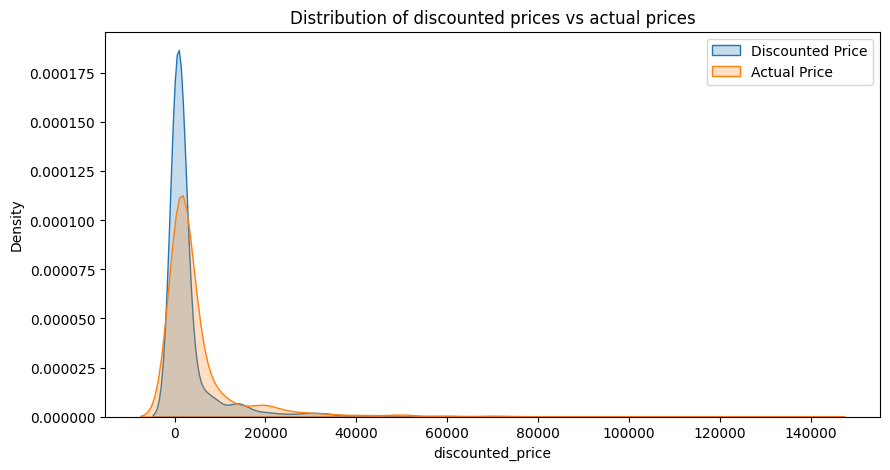

In [86]:
# 3. What is the distribution of discounted prices vs. actual prices?
print("Distribution of discounted prices vs actual prices :")
plt.figure(figsize=(10,5))
sns.kdeplot(df['discounted_price'], label='Discounted Price', fill=True)
sns.kdeplot(df['actual_price'], label='Actual Price', fill=True)
plt.title('Distribution of discounted prices vs actual prices')
plt.legend()
plt.show()

In [87]:
# 4. How does the average discount percentage vary across categories?

print("Average discount percentage vary across categories :")
discount_category = df.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=False)
print(discount_category)

Average discount percentage vary across categories :
main_category
HomeImprovement          57.500000
Computers&Accessories    54.024283
Health&PersonalCare      53.000000
Electronics              50.828897
MusicalInstruments       46.000000
Car&Motorbike            42.000000
Home&Kitchen             40.120536
OfficeProducts           12.354839
Toys&Games                0.000000
Name: discount_percentage, dtype: float64


In [88]:
# 5. What are the most popular product names?
print("Most popular product names :")
popular_product = df.sort_values(by='rating_count', ascending=False)[['product_name', 'rating_count']].head(10)
print(popular_product)

Most popular product names :
                                          product_name  rating_count
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      426973.0
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0
12   AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0
684  AmazonBasics Flexible Premium HDMI Cable (Blac...      426972.0
400  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
352  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
584  boAt BassHeads 100 in-Ear Wired Headphones wit...      363711.0
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...      313836.0
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...      313836.0
566  Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...      313832.0


In [90]:
# 6. What are the most popular product keywords?

print("Most popular product keywords : ")
from collections import Counter
import re

keywords = df['product_name'].dropna().apply(lambda x: re.findall(r'\b\w+\b', x.lower()))
flat_keywords = [word for sublist in keywords for word in sublist]
keyword_counts = Counter(flat_keywords)
print(keyword_counts.most_common(10))

Most popular product keywords : 
[('with', 752), ('for', 674), ('black', 530), ('usb', 417), ('cable', 414), ('1', 413), ('and', 331), ('c', 289), ('3', 275), ('2', 267)]


In [91]:
# 7. What are the most popular product reviews?

print("Most popular product reviews : ")
popular_reviews = df.loc[df['rating_count'].nlargest(5).index][['product_name', 'review_content']]
print(popular_reviews)

Most popular product reviews : 
                                          product_name  \
12   AmazonBasics Flexible Premium HDMI Cable (Blac...   
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...   
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...   
684  AmazonBasics Flexible Premium HDMI Cable (Blac...   
352  boAt Bassheads 100 in Ear Wired Earphones with...   

                                        review_content  
12   I am using it for 14 days now. The experience ...  
47   I am using it for 14 days now. The experience ...  
65   I am using it for 14 days now. The experience ...  
684  I am using it for 14 days now. The experience ...  
352  The sound quality of this earphone are really ...  


In [92]:
# 8. What is the correlation between discounted_price and rating?
print("Correlation between discounted_price and rating :")
correlation = df['discounted_price'].corr(df['rating'])
print(f"Correlation: {correlation:.2f}")

Correlation between discounted_price and rating :
Correlation: 0.12


In [94]:
# 9. What are the Top 5 categories based on the highest ratings?
print("Top 5 categories based on the highest ratings :")
top_categories = df.groupby('main_category')['rating'].mean().sort_values(ascending=False).head(5)
print(top_categories)

Top 5 categories based on the highest ratings :
main_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Name: rating, dtype: float64


10. Identify any potential areas for improvement or optimization based on the data analysis.
   - Some categories have low average ratings – investigate product quality or descriptions.
   - Large discounts don't always correlate with high ratings – reassess pricing strategy.
   - Focus marketing on products with high ratings but low visibility.
   - Improve SEO on frequently used keywords in product titles.
   - Consider customer feedback on low-rated high-discount products for improvements.

# EDA - 4 Spotify Data: Popular Hip-hop Artists and Tracks

In [96]:
from google.colab import files


uploaded = files.upload()

Saving spotify.csv to spotify.csv


In [97]:
df = pd.read_csv("spotify.csv")

In [98]:
# 1. Read the dataframe, check null value if present then do the needful, check duplicate row, if present then do the needful
print("Read the dataframe, check null value if present then do the needful, check duplicate row, if present then do the needful")

print("Null Values Before Handling:")
print(df.isnull().sum())

df.dropna(inplace=True)

df.drop_duplicates(inplace=True)

print("Null Values After Handling:")
print(df.isnull().sum())
print("Shape after removing nulls and duplicates:", df.shape)


Read the dataframe, check null value if present then do the needful, check duplicate row, if present then do the needful
Null Values Before Handling:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Null Values After Handling:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Shape after removing nulls and duplicates: (413, 5)


Distribution of popularity among the tracks in the dataset : 


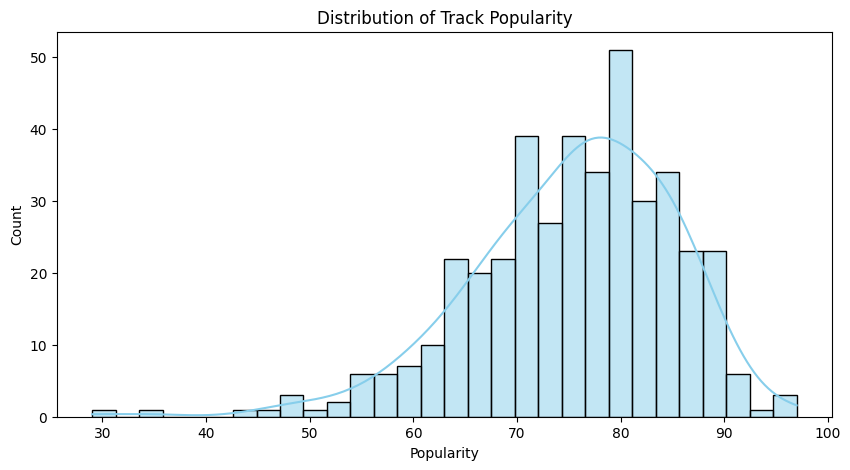

In [100]:
# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
print("Distribution of popularity among the tracks in the dataset : ")
plt.figure(figsize=(10,5))
sns.histplot(df['Popularity'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

Relationship between the popularity and the duration of tracks :


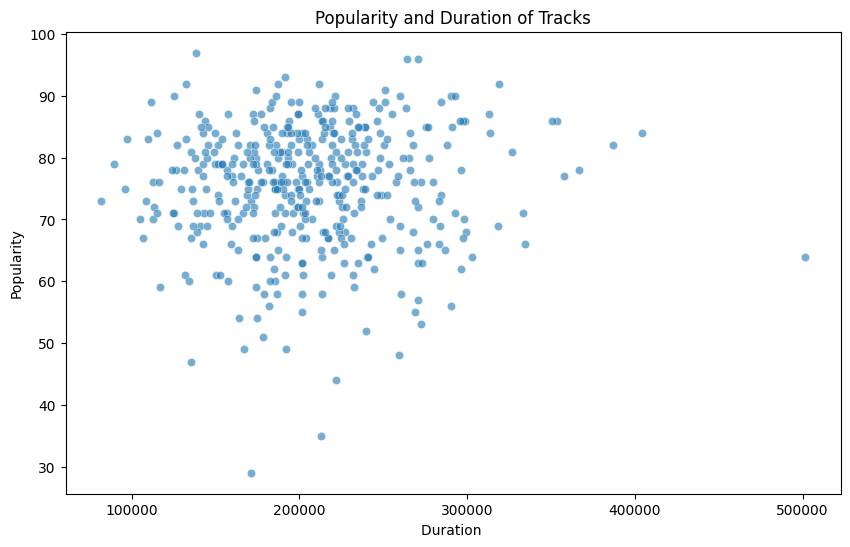

In [102]:
# 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
print("Relationship between the popularity and the duration of tracks :")
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', alpha=0.6)
plt.title("Popularity and Duration of Tracks")
plt.xlabel("Duration ")
plt.ylabel("Popularity")
plt.show()

Highest number of tracks in the dataset :


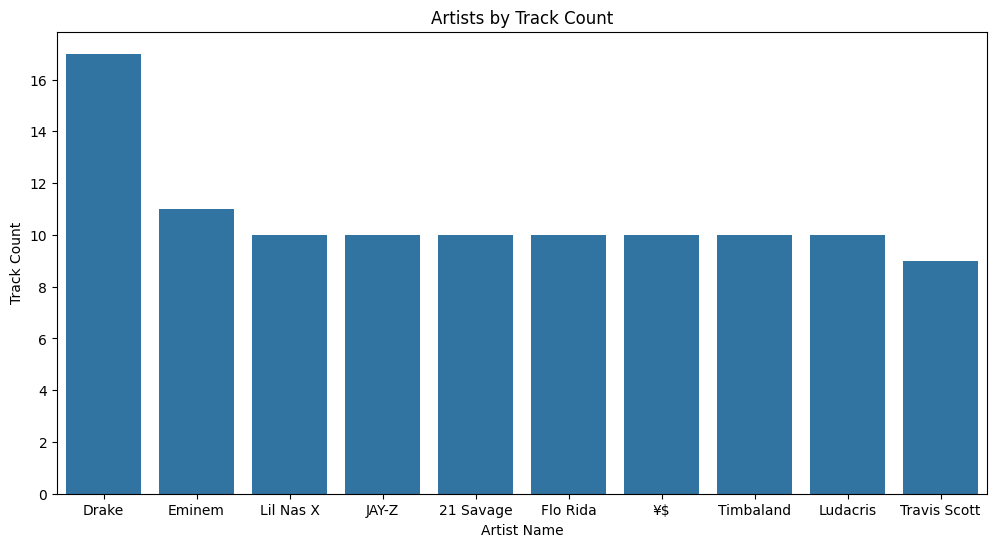

In [106]:
# 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
print("Highest number of tracks in the dataset :")
plt.figure(figsize=(12,6))
artists = df['Artist'].value_counts().head(10)
sns.countplot(data=df[df['Artist'].isin(artists.index)], x='Artist', order=artists.index)
plt.title("Artists by Track Count")
plt.xlabel("Artist Name")
plt.ylabel("Track Count")
plt.show()

In [107]:
# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
print("Top 5 least popular tracks in the dataset :")
least_popular = df.sort_values(by='Popularity').head(5)
print(least_popular[['Artist', 'Track Name', 'Popularity']])

Top 5 least popular tracks in the dataset :
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [108]:
# 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
print("Top 5 most popular artists that has the highest popularity on average :")
top_5 = df['Artist'].value_counts().head(5).index
average_popularity = df[df['Artist'].isin(top_5)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print(average_popularity)

Top 5 most popular artists that has the highest popularity on average :
Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


In [110]:
# 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
print("Top 5 most popular artists : ")
popular_tracks = df[df['Artist'].isin(top_5)].sort_values(by='Popularity', ascending=False)
for artist in top_5:
    top_track = popular_tracks[popular_tracks['Artist'] == artist].iloc[0]
    print(f"{artist}: {top_track['Track Name']} (Popularity: {top_track['Popularity']})")

Top 5 most popular artists : 
Drake: Rich Baby Daddy (feat. Sexyy Red & SZA) (Popularity: 92)
Eminem: Without Me (Popularity: 90)
Lil Nas X: THATS WHAT I WANT (Popularity: 81)
JAY-Z: Ni**as In Paris (Popularity: 86)
21 Savage: redrum (Popularity: 96)


Relationships between multiple numerical variables :


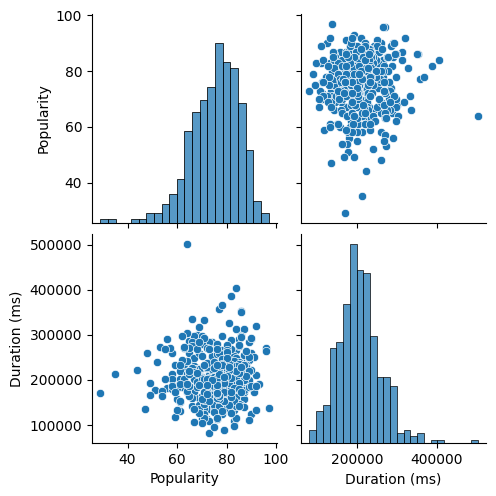

In [113]:
# 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot
print("Relationships between multiple numerical variables :")
sns.pairplot(df[['Popularity', 'Duration (ms)']].dropna())
plt.show()

Duration of tracks vary significantly across different artists :


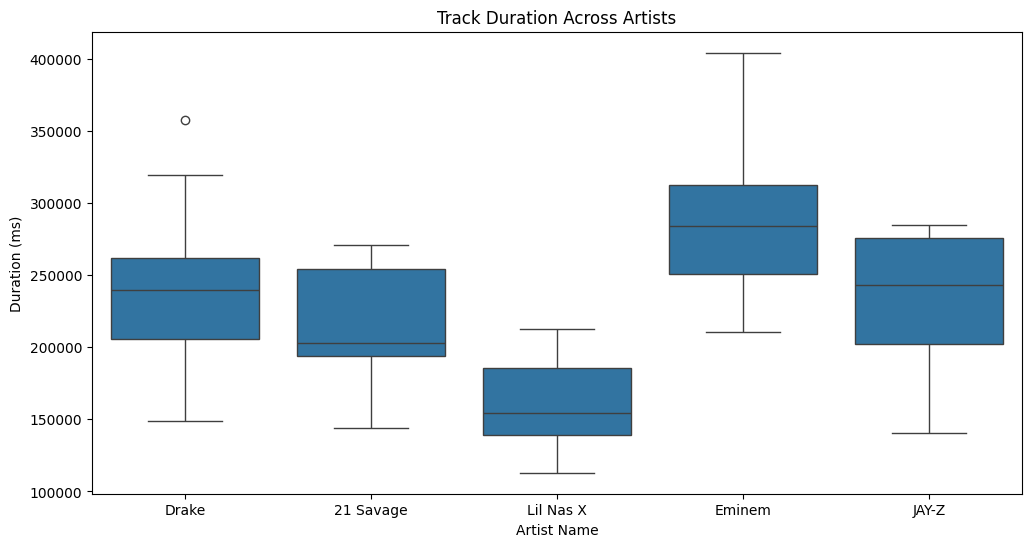

In [116]:
# 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
print("Duration of tracks vary significantly across different artists :")
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['Artist'].isin(top_5)], x='Artist', y='Duration (ms)')
plt.title("Track Duration Across Artists")
plt.xlabel("Artist Name")
plt.ylabel("Duration (ms)")
plt.show()

Distribution of track popularity vary for different artists :


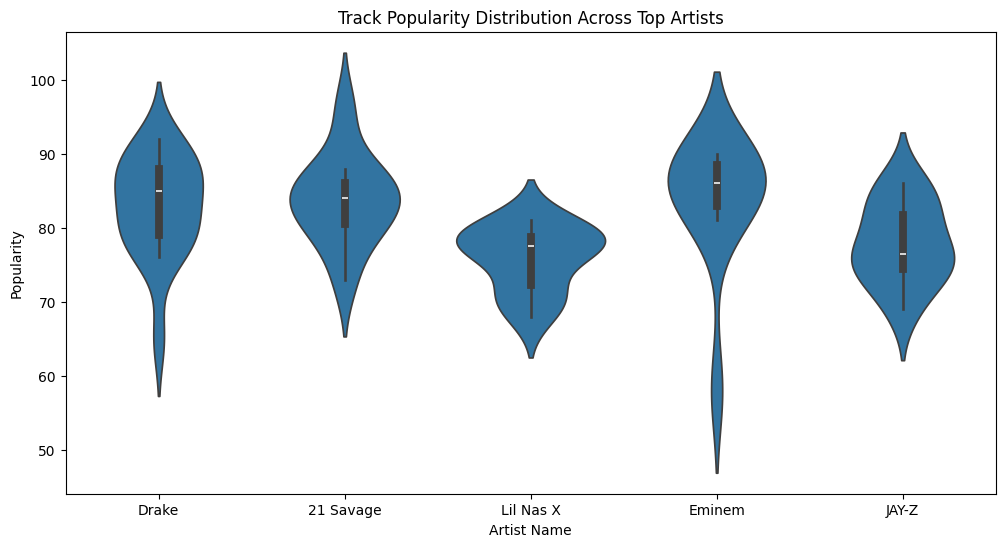

In [118]:
# 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot
print("Distribution of track popularity vary for different artists :")
plt.figure(figsize=(12,6))
sns.violinplot(data=df[df['Artist'].isin(top_5)], x='Artist', y='Popularity')
plt.title("Track Popularity Distribution Across Top Artists")
plt.xlabel("Artist Name")
plt.ylabel("Popularity")
plt.show()